In [28]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [29]:
sms = pd.read_csv('spam_messages.csv')
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [30]:
# Checking the shape of the dataset
print ('\nShape of dataset:', sms.shape)


Shape of dataset: (2893, 3)


In [31]:
print ('\nValue counts:', sms.label.value_counts())


Value counts: 0    2412
1     481
Name: label, dtype: int64


In [32]:
# Ratio
print ('\nSpam ratio: ', round(len(sms[sms['label'] == 0]) / len(sms.label),2) *100, '%')



Spam ratio:  83.0 %


In [33]:
# New column for length of message
sms['length'] = sms.message.str.len()
sms.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [34]:
# Convert all messages to lowercase
sms['message'] =  sms.message.str.lower()

In [35]:
sms.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [36]:
# replace email addresses with email
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# replace urls with 'webaddress'
sms['message']  =sms['message'].str.replace(r'^http\://[a-zA-z0-9\-\.]+.[a-zA-z]{2,3}(/\s*)?$', 'webaddress')

# Replace 10 digit phone numbers(formats include parenthesis, spaces, nospaces, dashes) with 'phonenumber'
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

In [37]:
sms.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [38]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

In [39]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stop_words =  (stopwords.words('english'))

In [41]:
sms['message'] = sms['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [42]:
sms['clean_length'] = sms.message.str.len()
sms.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,2487
1,NaN,"lang classification grimes , joseph e . barbar...",0,1800,1571
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas ( satamas @ umab...,0,1435,1144
3,risk,colleague researching differing degrees risk p...,0,324,220
4,request book information,earlier morning phone friend mine living south...,0,1046,719


In [43]:
# Total length remocval
print ('\nOriginal Length :', sms.length.sum())
print ('\nClean length : ', sms.clean_length.sum())


Original Length : 9344743

Clean length :  7551965


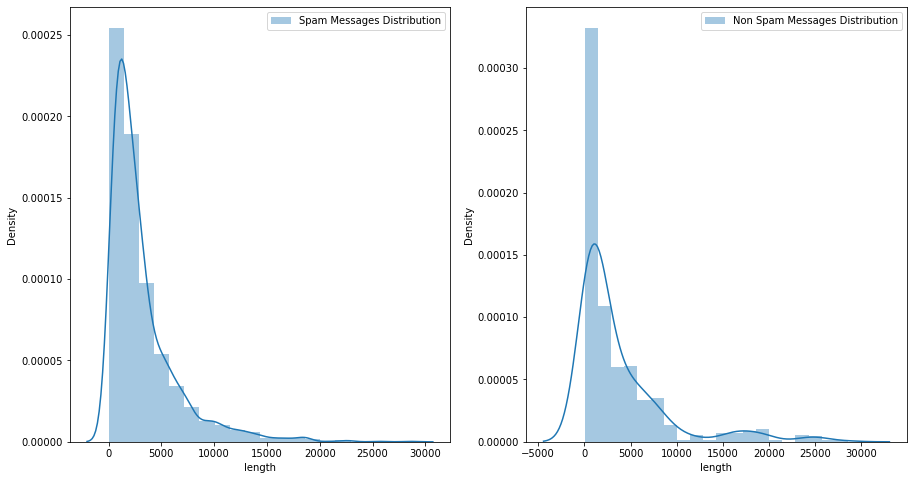

In [44]:
# Message Distribution before cleaning

f, ax = plt.subplots(1,2, figsize = (15, 8))

sns.distplot(sms[sms['label'] == 0] ['length'], bins=20, ax=ax[0], label = 'Spam Messages Distribution')
ax[0].set_label ('Spam message length')
ax[0].legend()

sns.distplot(sms[sms['label'] == 1]['length'], bins=20, ax=ax[1], label = 'Non Spam Messages Distribution')
ax[1].set_label ('Non Spam message length')
ax[1].legend()

plt.show()

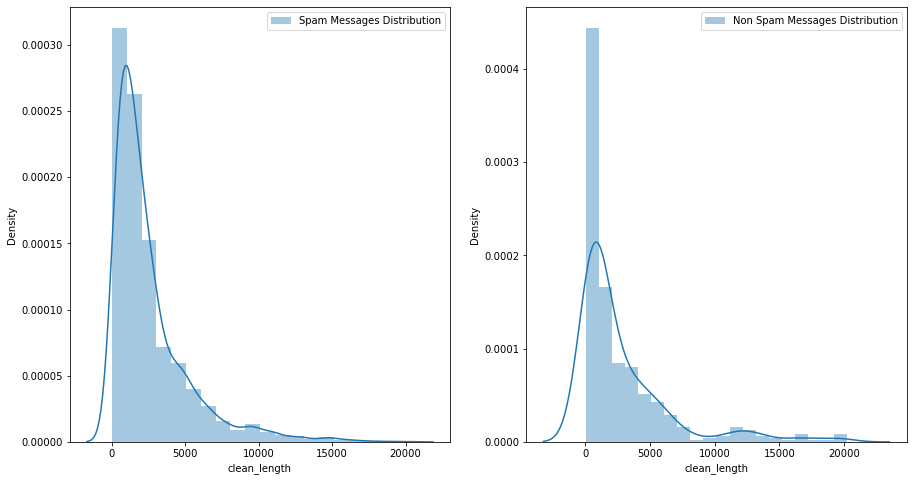

In [45]:
# Message distribution after cleaning

f, ax = plt.subplots(1,2, figsize = (15, 8))

sns.distplot(sms[sms['label'] == 0] ['clean_length'], bins=20, ax=ax[0], label = 'Spam Messages Distribution')
ax[0].set_label ('Spam message length')
ax[0].legend()

sns.distplot(sms[sms['label'] == 1]['clean_length'], bins=20, ax=ax[1], label = 'Non Spam Messages Distribution')
ax[1].set_label ('Non Spam message length')
ax[1].legend()

plt.show()

In [46]:
# Getting sense of loud words in spam

from wordcloud import WordCloud

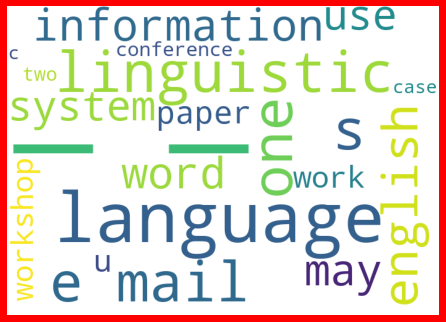

In [47]:
spams = sms['message'] [sms['label']== 0]
spam_cloud = WordCloud(width=700, height=500, background_color='white', max_words=20).generate(' '.join(spams))

plt.figure(figsize = (6, 6), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see that some of the words above looks like spam message words.

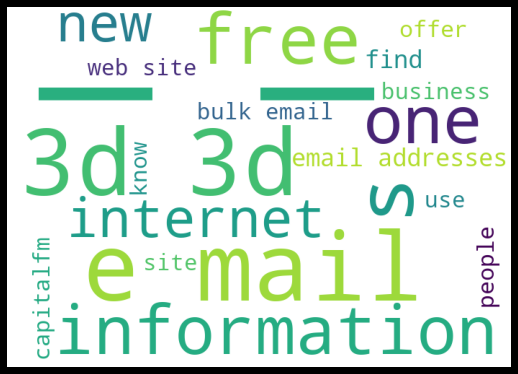

In [48]:
non_spams = sms['message'] [sms['label']== 1]
non_spam_cloud = WordCloud(width=700, height=500, background_color='white', max_words=20).generate(' '.join(non_spams))

plt.figure(figsize = (7, 7), facecolor='k')
plt.imshow(non_spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [49]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB Classifier
# 3. split fewature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
naive = MultinomialNB()
features = tf_vec.fit_transform(sms['message'])

x= features
y= sms['label']

In [50]:
# train and predict

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
naive.fit(x_train, y_train)
y_pred = naive.predict(x_test)
print ('\n Final Score:', accuracy_score(y_test, y_pred))



 Final Score: 0.8342541436464088


In [51]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.24       139

    accuracy                           0.83       724
   macro avg       0.91      0.57      0.57       724
weighted avg       0.86      0.83      0.78       724



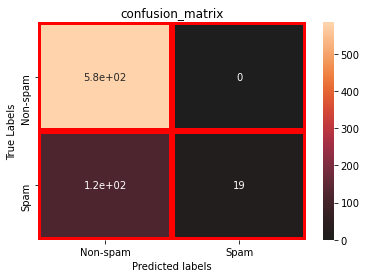

In [53]:
# plot confusion matriux heatmap

conf_mat = confusion_matrix(y_test, y_pred)
ax=plt.subplot()

sns.heatmap(conf_mat, annot=True, ax=ax, linewidth=5, linecolor='r', center=0)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True Labels')

ax.set_title('confusion_matrix')
ax.xaxis.set_ticklabels(['Non-spam', 'Spam'])
ax.yaxis.set_ticklabels(['Non-spam', 'Spam'])

plt.show()

In [54]:
conf_mat

array([[585,   0],
       [120,  19]], dtype=int64)